<a href="https://colab.research.google.com/github/rituki11/xlk-interest-rate-analysis/blob/main/analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price             Close         High          Low         Open      Volume
Ticker            ^GSPC        ^GSPC        ^GSPC        ^GSPC       ^GSPC
Date                                                                      
2020-01-02  3257.850098  3258.139893  3235.530029  3244.669922  3459930000
2020-01-03  3234.850098  3246.149902  3222.340088  3226.360107  3484700000
2020-01-06  3246.280029  3246.840088  3214.639893  3217.550049  3702460000
2020-01-07  3237.179932  3244.909912  3232.429932  3241.860107  3435910000
2020-01-08  3253.050049  3267.070068  3236.669922  3238.590088  3726840000


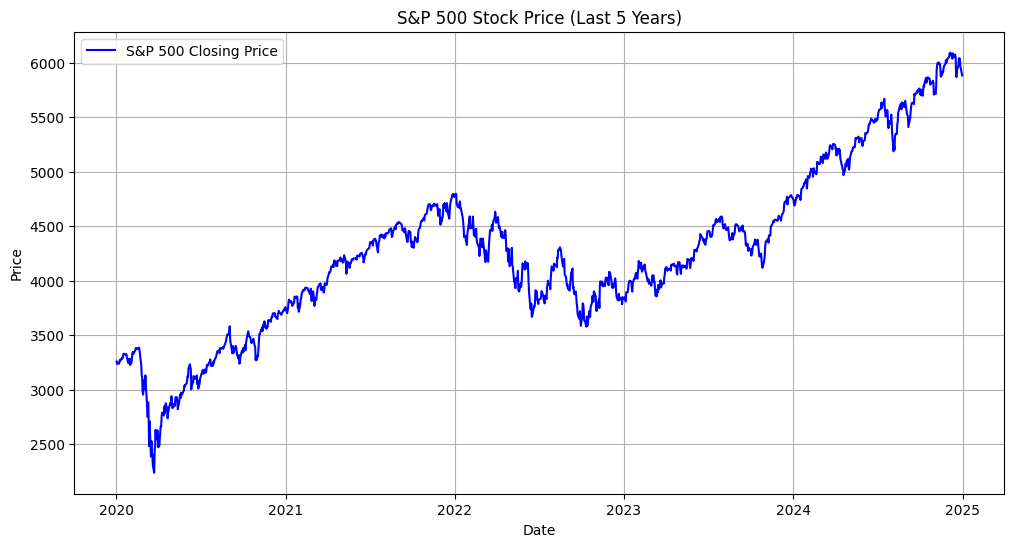

In [1]:
# ライブラリのインストール (初回のみ)
!pip install yfinance

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# 例: S&P500 の過去5年分のデータを取得
ticker = "^GSPC"  # S&P500
data = yf.download(ticker, start="2020-01-01", end="2025-01-01")

# データの確認
print(data.head())

# 株価の推移をプロット
plt.figure(figsize=(12, 6))
plt.plot(data["Close"], label="S&P 500 Closing Price", color="blue")
plt.title("S&P 500 Stock Price (Last 5 Years)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid()
plt.show()


In [3]:
# 必要なライブラリをインストール（初回のみ）
!pip install yfinance

import yfinance as yf
import pandas as pd

# 各業種のセクターETFのティッカー
sectors = {
    "Technology": "XLK",
    "Healthcare": "XLV",
    "Financials": "XLF",
    "Energy": "XLE",
    "Consumer Discretionary": "XLY",
    "Industrials": "XLI",
    "Materials": "XLB",
    "Real Estate": "XLRE",
    "Utilities": "XLU",
    "Consumer Staples": "XLP"
}

# 期間を指定してデータを取得
start_date = "2020-01-01"
end_date = "2025-01-01"

# データ取得のテスト
for sector, ticker in sectors.items():
    data = yf.download(ticker, start=start_date, end=end_date)
    if data.empty:
        print(f"⚠️ {sector} のデータが取得できませんでした: {ticker}")
    else:
        print(f"✅ {sector} のデータ取得成功: {ticker}")


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


✅ Technology のデータ取得成功: XLK
✅ Healthcare のデータ取得成功: XLV
✅ Financials のデータ取得成功: XLF


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


✅ Energy のデータ取得成功: XLE
✅ Consumer Discretionary のデータ取得成功: XLY
✅ Industrials のデータ取得成功: XLI


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

✅ Materials のデータ取得成功: XLB
✅ Real Estate のデータ取得成功: XLRE
✅ Utilities のデータ取得成功: XLU
✅ Consumer Staples のデータ取得成功: XLP


           Technology Healthcare Financials     Energy Consumer Discretionary  \
Ticker            XLK        XLV        XLF        XLE                    XLY   
Date                                                                            
2020-01-02  89.251068  94.315811  28.171789  48.587864             121.595078   
2020-01-03  88.247597  93.493904  27.872662  48.443501             120.560295   
2020-01-06  88.457840  94.075706  27.854540  48.820454             120.895645   
2020-01-07  88.419609  93.890999  27.673248  48.692127             120.704010   
2020-01-08  89.365738  94.500511  27.854540  47.890087             121.068100   

           Industrials  Materials Real Estate  Utilities Consumer Staples  
Ticker             XLI        XLB        XLRE        XLU              XLP  
Date                                                                       
2020-01-02   76.397301  54.839382   32.298370  54.408081        54.743786  
2020-01-03   76.250038  53.954006   32.534985  

<ipython-input-5-3e1ab4a2f685>:12: MatplotlibDeprecationWarning: Passing label as a length 2 sequence when plotting a single dataset is deprecated in Matplotlib 3.9 and will error in 3.11.  To keep the current behavior, cast the sequence to string before passing.
  plt.plot(df[sector], label=sector)


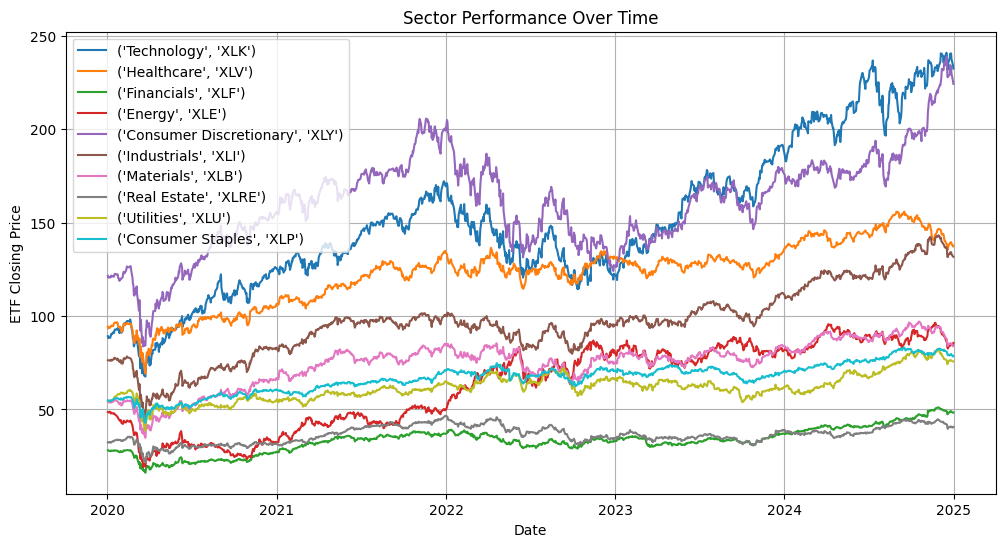

In [5]:
import matplotlib.pyplot as plt

# DataFrameにまとめる
df = pd.concat(etf_data, axis=1)

# データの確認
print(df.head())

# 可視化
plt.figure(figsize=(12, 6))
for sector in df.columns:
    plt.plot(df[sector], label=sector)

plt.title("Sector Performance Over Time")
plt.xlabel("Date")
plt.ylabel("ETF Closing Price")
plt.legend()
plt.grid()
plt.show()


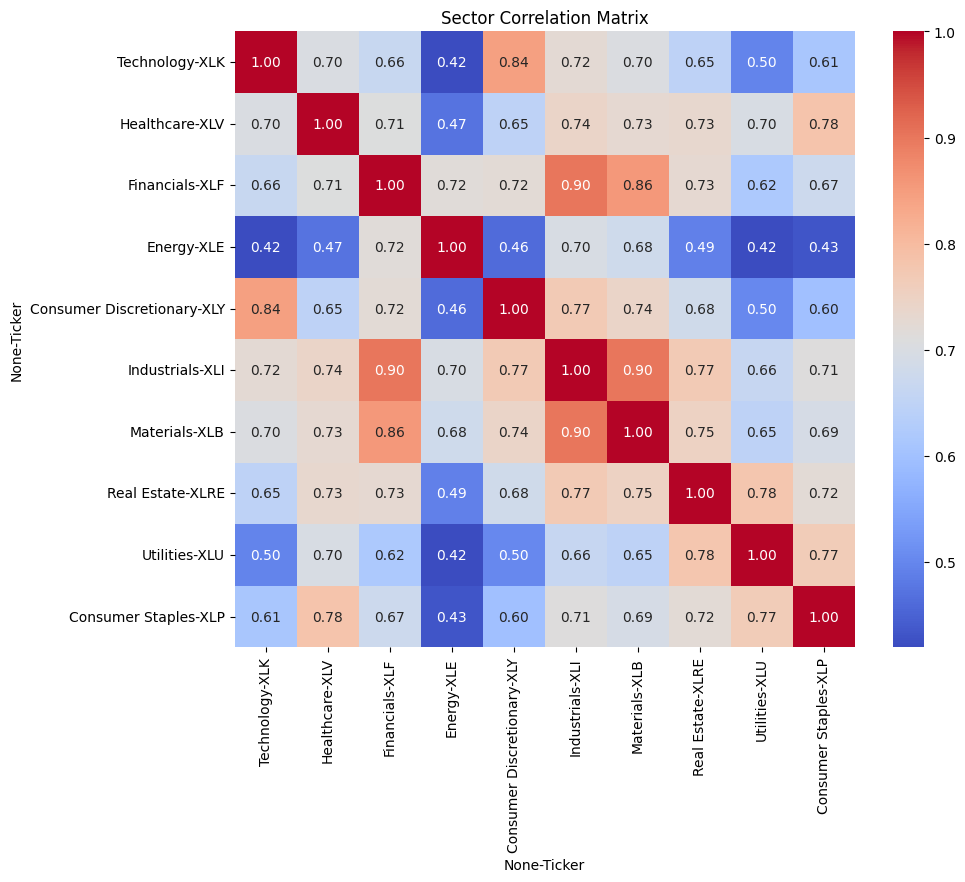

In [6]:
import seaborn as sns

# 相関行列を計算
correlation_matrix = df.pct_change().corr()

# ヒートマップで可視化
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Sector Correlation Matrix")
plt.show()


<ipython-input-7-b4be2fd23d74>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_returns = df_last_year.pct_change().resample("M").mean()


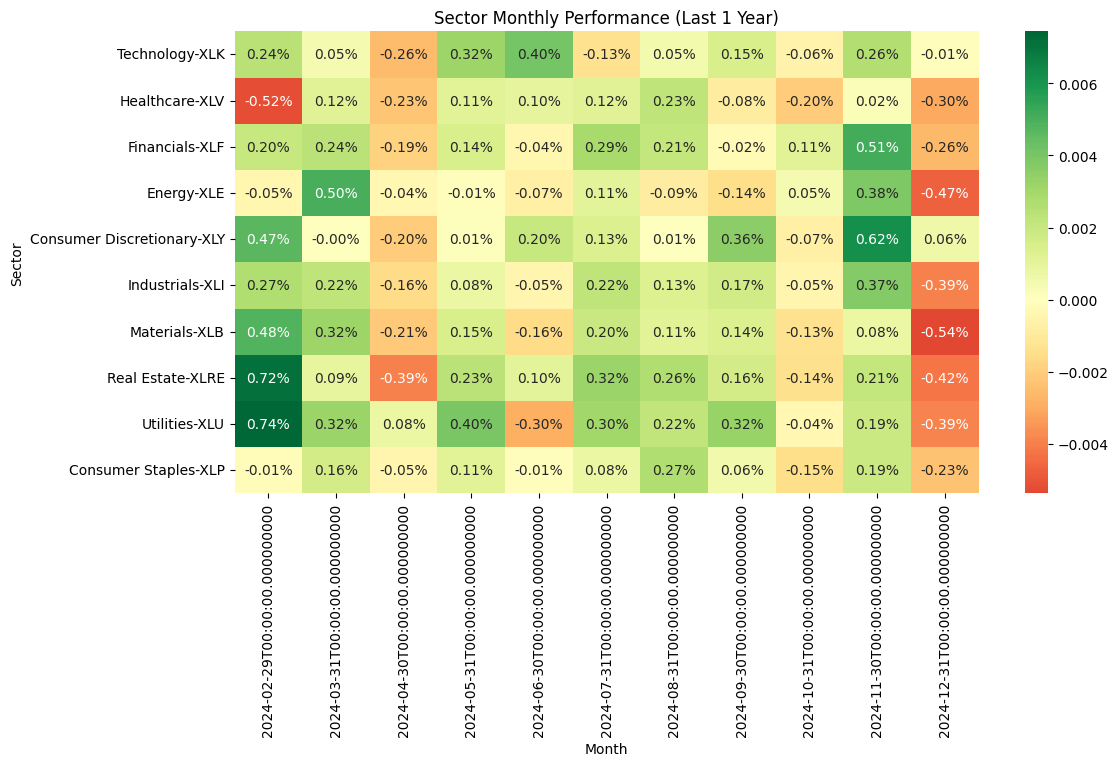

In [7]:
# 直近1年分のデータを取得
df_last_year = df[df.index >= pd.Timestamp.today() - pd.DateOffset(years=1)]

# 月ごとのリターンを計算
monthly_returns = df_last_year.pct_change().resample("M").mean()

# ヒートマップで可視化
plt.figure(figsize=(12, 6))
sns.heatmap(monthly_returns.T, annot=True, cmap="RdYlGn", fmt=".2%", center=0)
plt.title("Sector Monthly Performance (Last 1 Year)")
plt.xlabel("Month")
plt.ylabel("Sector")
plt.show()


In [17]:
print(df.columns)


Index(['XLK', 'XLV', 'XLF', 'XLE', 'XLY', 'XLI', 'XLB', 'XLRE', 'XLU', 'XLP'], dtype='object')


In [18]:
df.columns = [col[1] if isinstance(col, tuple) else col for col in df.columns]
print(df.columns)  # 確認


Index(['XLK', 'XLV', 'XLF', 'XLE', 'XLY', 'XLI', 'XLB', 'XLRE', 'XLU', 'XLP'], dtype='object')


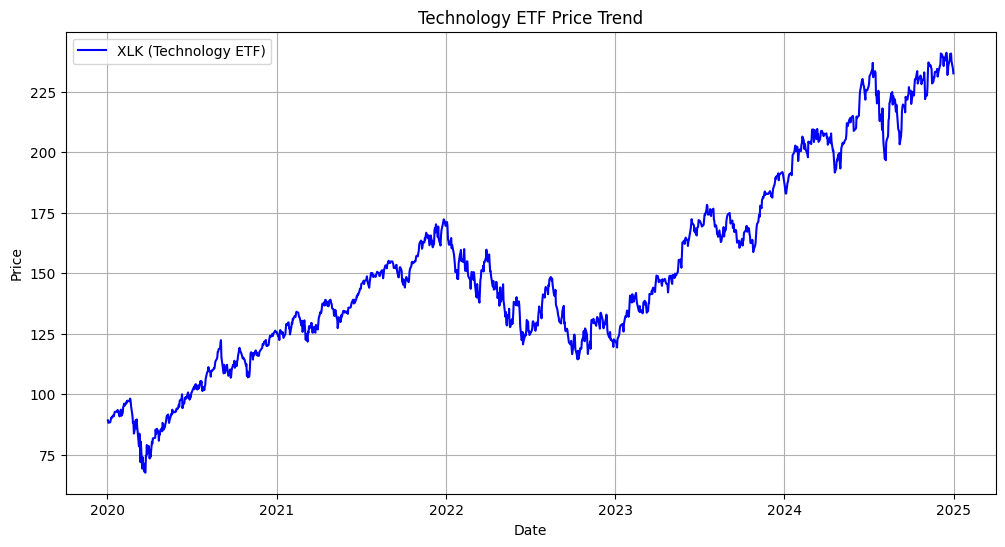

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(df["XLK"], label="XLK (Technology ETF)", color="blue")
plt.title("Technology ETF Price Trend")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid()
plt.show()


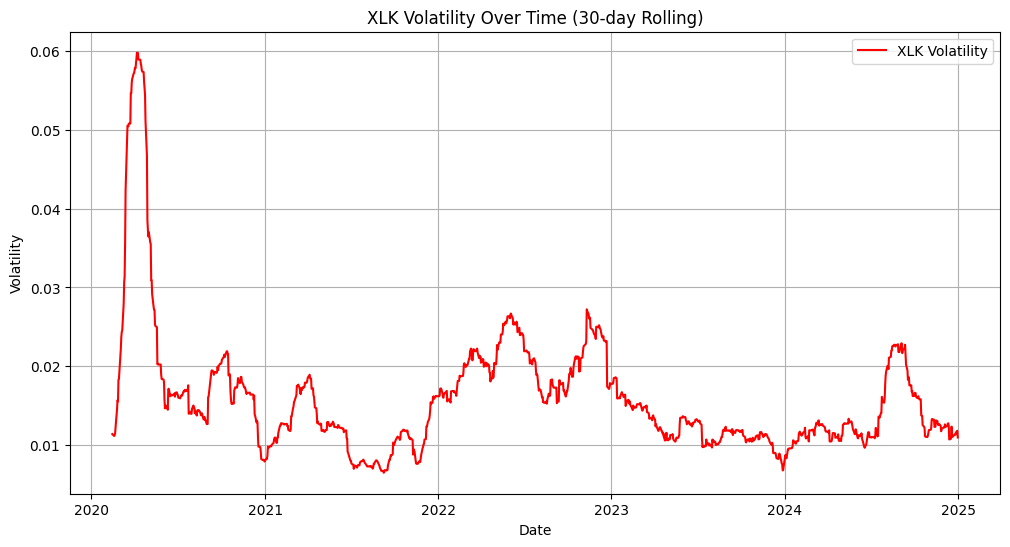

In [22]:
df_volatility = df.pct_change().rolling(window=30).std()  # 30日間の移動標準偏差

plt.figure(figsize=(12, 6))
plt.plot(df_volatility["XLK"], label="XLK Volatility", color="red")
plt.title("XLK Volatility Over Time (30-day Rolling)")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.legend()
plt.grid()
plt.show()


In [25]:
for ticker, data in company_data.items():
    print(f"{ticker} のデータサンプル:")
    print(data.head())  # 先頭5行を確認
    print("\n")


AAPL のデータサンプル:
Ticker           AAPL
Date                 
2020-01-02  72.716064
2020-01-03  72.009132
2020-01-06  72.582909
2020-01-07  72.241531
2020-01-08  73.403641


MSFT のデータサンプル:
Ticker            MSFT
Date                  
2020-01-02  153.630692
2020-01-03  151.717728
2020-01-06  152.109894
2020-01-07  150.722961
2020-01-08  153.123734


NVDA のデータサンプル:
Ticker          NVDA
Date                
2020-01-02  5.972710
2020-01-03  5.877110
2020-01-06  5.901757
2020-01-07  5.973209
2020-01-08  5.984412




In [26]:
# カラム名を企業のティッカーにリネーム
for ticker in company_data.keys():
    company_data[ticker] = company_data[ticker].rename(columns={"Ticker": ticker})

# すべてのデータを1つの DataFrame に統合
df_companies = pd.concat(company_data.values(), axis=1)

# データ確認
print(df_companies.head())


Ticker           AAPL        MSFT      NVDA
Date                                       
2020-01-02  72.716064  153.630692  5.972710
2020-01-03  72.009132  151.717728  5.877110
2020-01-06  72.582909  152.109894  5.901757
2020-01-07  72.241531  150.722961  5.973209
2020-01-08  73.403641  153.123734  5.984412


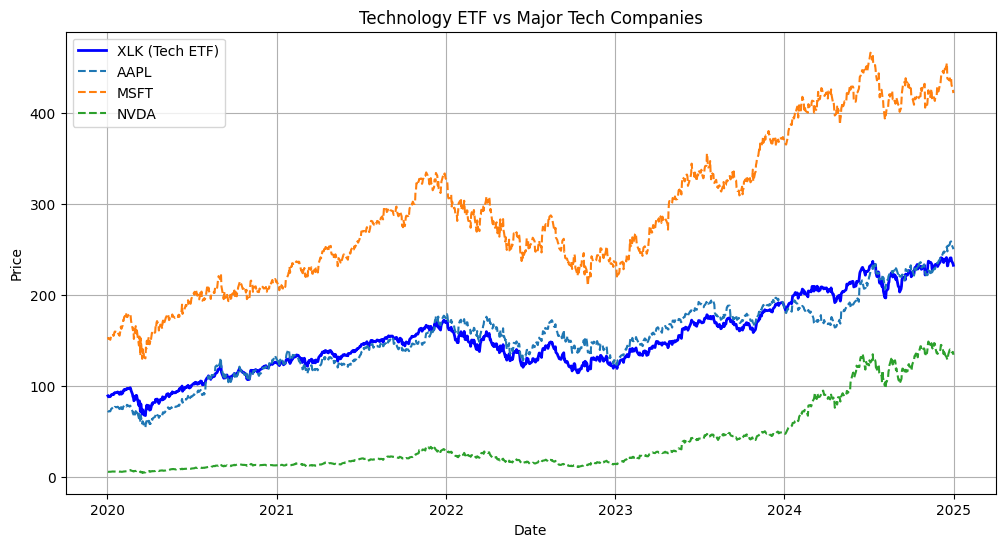

In [27]:
plt.figure(figsize=(12, 6))
plt.plot(df["XLK"], label="XLK (Tech ETF)", color="blue", linewidth=2)

for company in df_companies.columns:
    plt.plot(df_companies[company], label=company, linestyle="--")

plt.title("Technology ETF vs Major Tech Companies")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid()
plt.show()


<ipython-input-30-5c03e808165e>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_returns = df_companies.pct_change().resample("M").mean() * 100
<ipython-input-30-5c03e808165e>:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(df["XLK"].pct_change().resample("M").mean() * 100, label="XLK ETF Monthly Return", linestyle="--", color="black")


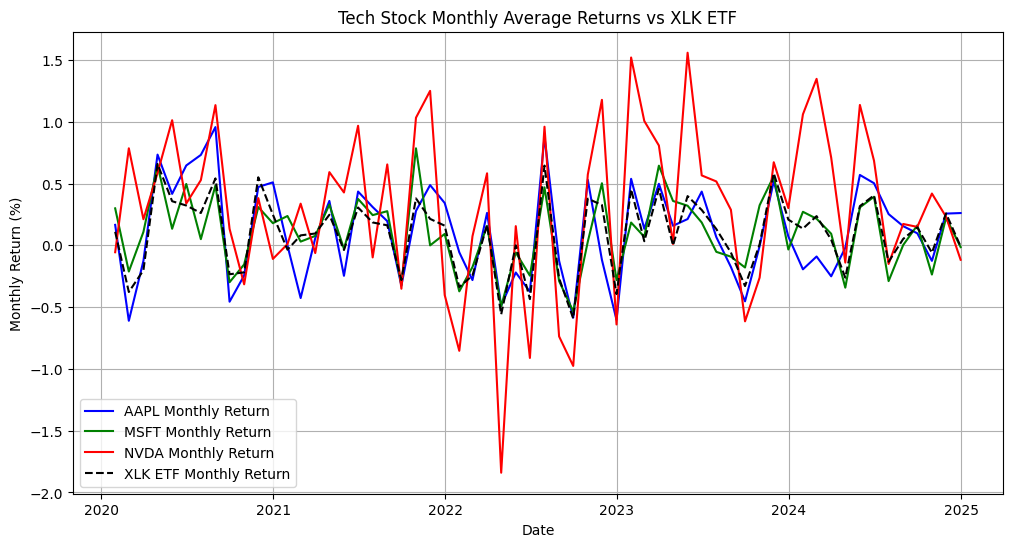

In [30]:
# 月次リターンの計算
monthly_returns = df_companies.pct_change().resample("M").mean() * 100

# プロット
plt.figure(figsize=(12, 6))
plt.plot(monthly_returns["AAPL"], label="AAPL Monthly Return", linestyle="-", color="blue")
plt.plot(monthly_returns["MSFT"], label="MSFT Monthly Return", linestyle="-", color="green")
plt.plot(monthly_returns["NVDA"], label="NVDA Monthly Return", linestyle="-", color="red")
plt.plot(df["XLK"].pct_change().resample("M").mean() * 100, label="XLK ETF Monthly Return", linestyle="--", color="black")

plt.title("Tech Stock Monthly Average Returns vs XLK ETF")
plt.xlabel("Date")
plt.ylabel("Monthly Return (%)")
plt.legend()
plt.grid()
plt.show()


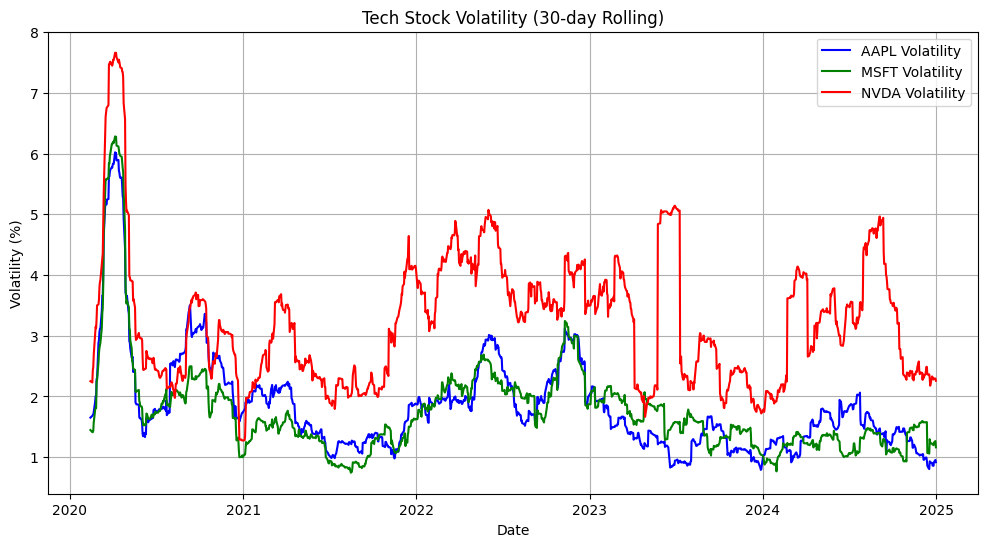

In [29]:
# 30日間の移動標準偏差（ボラティリティ）を計算
volatility = df_companies.pct_change().rolling(window=30).std() * 100

# プロット
plt.figure(figsize=(12, 6))
plt.plot(volatility["AAPL"], label="AAPL Volatility", linestyle="-", color="blue")
plt.plot(volatility["MSFT"], label="MSFT Volatility", linestyle="-", color="green")
plt.plot(volatility["NVDA"], label="NVDA Volatility", linestyle="-", color="red")

plt.title("Tech Stock Volatility (30-day Rolling)")
plt.xlabel("Date")
plt.ylabel("Volatility (%)")
plt.legend()
plt.grid()
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30330 (\N{CJK UNIFIED IDEOGRAPH-767A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 34920 (\N{CJK UNIFIED IDEOGRAPH-8868}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27770 (\N{CJK UNIFIED IDEOGRAPH-6C7A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 31639 (\N{CJK UNIFIED IDEOGRAPH-7B97}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


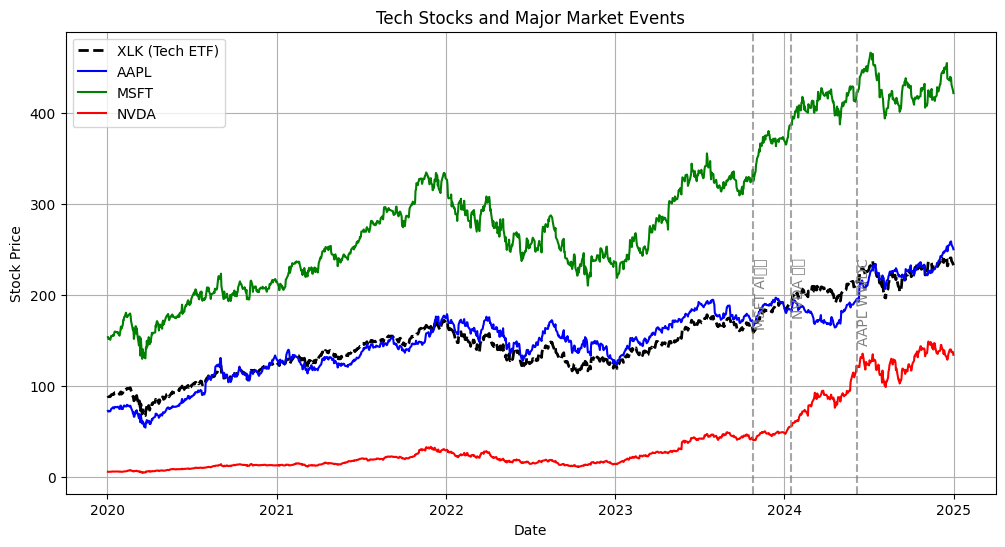

In [31]:
# 主要なイベントの日付
events = {
    "MSFT AI発表": "2023-10-25",
    "NVDA 決算": "2024-01-15",
    "AAPL WWDC": "2024-06-05"
}

# プロット
plt.figure(figsize=(12, 6))
plt.plot(df["XLK"], label="XLK (Tech ETF)", color="black", linestyle="--", linewidth=2)
plt.plot(df_companies["AAPL"], label="AAPL", color="blue", linewidth=1.5)
plt.plot(df_companies["MSFT"], label="MSFT", color="green", linewidth=1.5)
plt.plot(df_companies["NVDA"], label="NVDA", color="red", linewidth=1.5)

# イベントの日付を垂直線で表示
for event, date in events.items():
    plt.axvline(pd.Timestamp(date), color="gray", linestyle="--", alpha=0.7)
    plt.text(pd.Timestamp(date), df.max().max(), event, rotation=90, verticalalignment='top', fontsize=10, color="gray")

plt.title("Tech Stocks and Major Market Events")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.grid()
plt.show()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


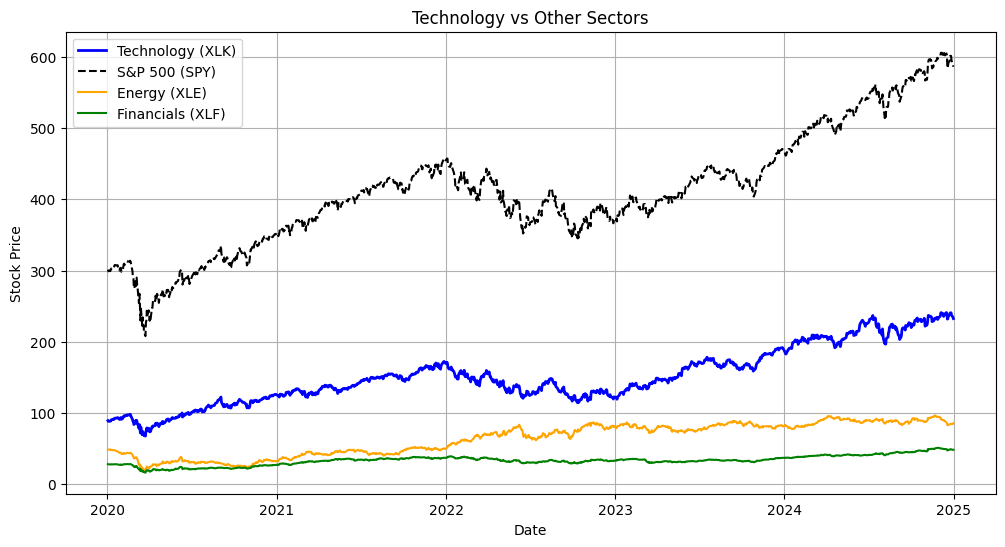

In [33]:
# 他のセクターETFと比較（例: S&P500, エネルギー, 金融）
sectors = {
    "Technology (XLK)": "XLK",
    "S&P 500 (SPY)": "SPY",
    "Energy (XLE)": "XLE",
    "Financials (XLF)": "XLF"
}

# データ取得（辞書形式）
sector_data = {}
for name, ticker in sectors.items():
    data = yf.download(ticker, start="2020-01-01", end="2025-01-01")["Close"]
    if not data.empty:
        sector_data[name] = data

# DataFrame に変換（エラー回避）
df_sectors = pd.concat(sector_data.values(), axis=1)
df_sectors.columns = sector_data.keys()  # カラム名をセクター名に設定

# プロット
plt.figure(figsize=(12, 6))
plt.plot(df_sectors["Technology (XLK)"], label="Technology (XLK)", color="blue", linewidth=2)
plt.plot(df_sectors["S&P 500 (SPY)"], label="S&P 500 (SPY)", color="black", linestyle="--")
plt.plot(df_sectors["Energy (XLE)"], label="Energy (XLE)", color="orange")
plt.plot(df_sectors["Financials (XLF)"], label="Financials (XLF)", color="green")

plt.title("Technology vs Other Sectors")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.grid()
plt.show()


[*********************100%***********************]  1 of 1 completed


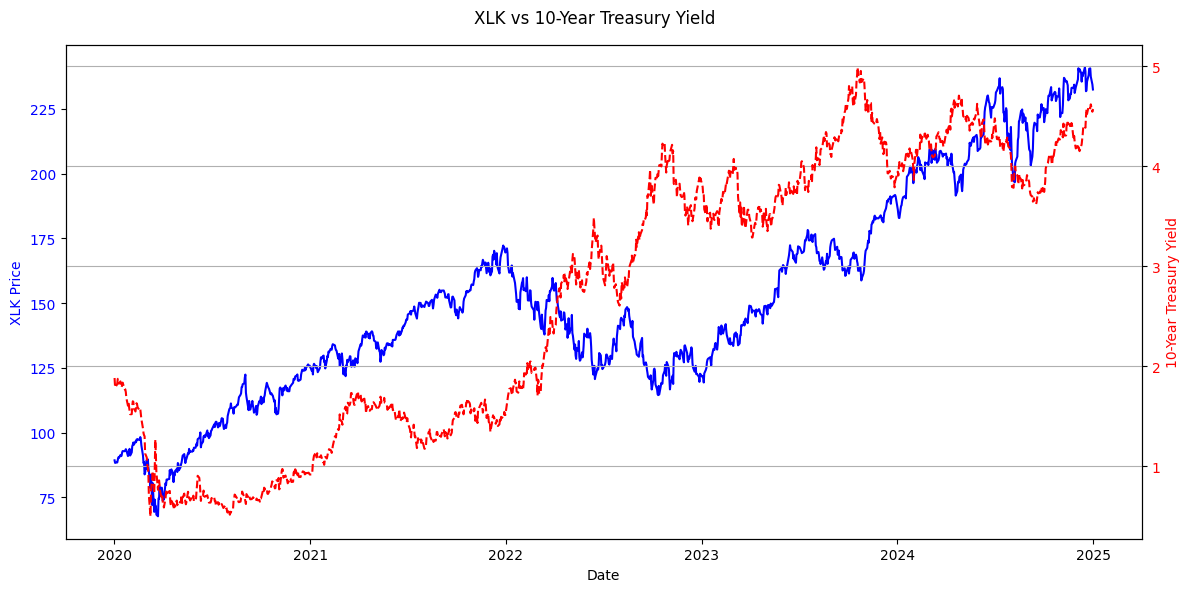

In [35]:
# 米10年国債利回りデータ取得
bond_yield = yf.download("^TNX", start="2020-01-01", end="2025-01-01")["Close"]

# プロット
fig, ax1 = plt.subplots(figsize=(12,6))

# XLKの株価推移
ax1.set_xlabel("Date")
ax1.set_ylabel("XLK Price", color="blue")
ax1.plot(df_sectors["Technology (XLK)"], color="blue", label="Technology (XLK)")
ax1.tick_params(axis="y", labelcolor="blue")

# 金利の推移
ax2 = ax1.twinx()
ax2.set_ylabel("10-Year Treasury Yield", color="red")
ax2.plot(bond_yield, color="red", linestyle="--", label="10-Year Treasury Yield")
ax2.tick_params(axis="y", labelcolor="red")

fig.suptitle("XLK vs 10-Year Treasury Yield")
fig.tight_layout()
plt.grid()
plt.show()


[*********************100%***********************]  1 of 1 completed


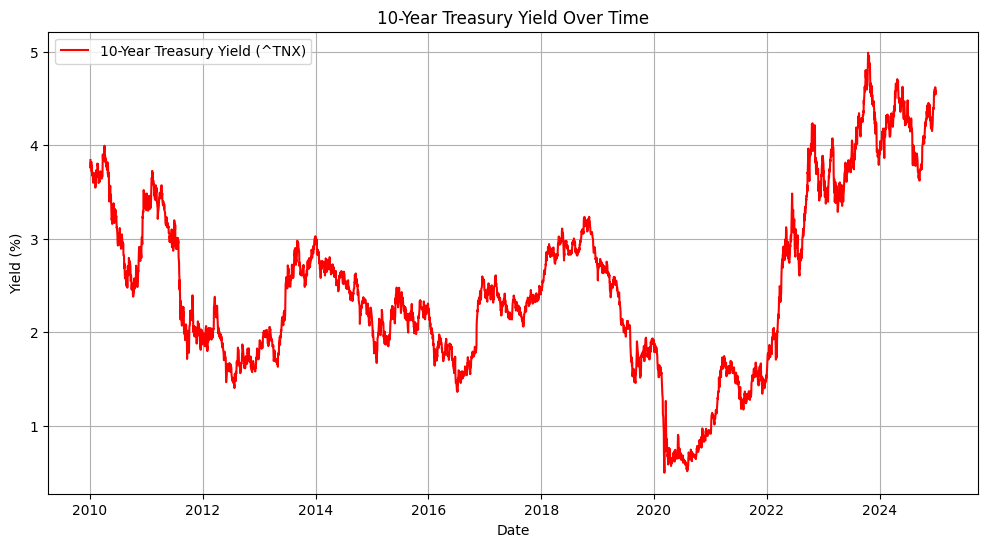

In [36]:
import yfinance as yf

# 10年国債利回り (^TNX) を取得
tnx = yf.download("^TNX", start="2010-01-01", end="2025-01-01")["Close"]

# プロット
plt.figure(figsize=(12, 6))
plt.plot(tnx, label="10-Year Treasury Yield (^TNX)", color="red")
plt.title("10-Year Treasury Yield Over Time")
plt.xlabel("Date")
plt.ylabel("Yield (%)")
plt.legend()
plt.grid()
plt.show()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


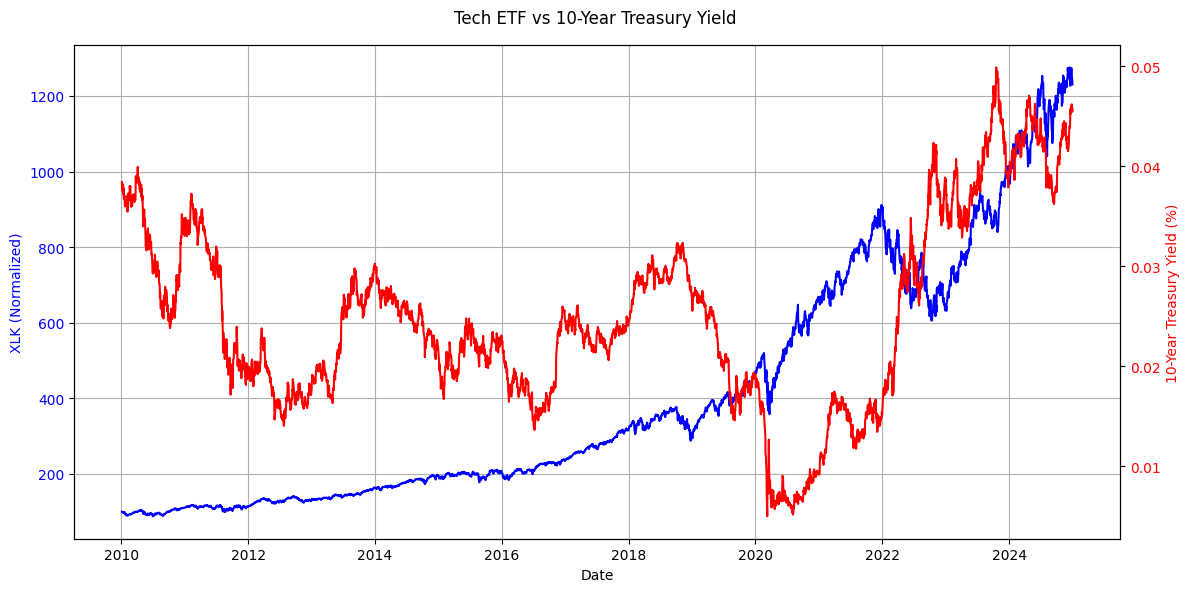

In [39]:
import matplotlib.pyplot as plt
import yfinance as yf

# データ取得
xlk = yf.download("XLK", start="2010-01-01", end="2025-01-01")["Close"]
tnx = yf.download("^TNX", start="2010-01-01", end="2025-01-01")["Close"] / 100  # 100で割ってパーセント表記に修正

# プロット
fig, ax1 = plt.subplots(figsize=(12, 6))

# XLKを左軸にプロット
ax1.plot(xlk / xlk.iloc[0] * 100, label="XLK (Tech ETF, Normalized)", color="blue")
ax1.set_xlabel("Date")
ax1.set_ylabel("XLK (Normalized)", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")
ax1.grid()

# TNXを右軸にプロット
ax2 = ax1.twinx()
ax2.plot(tnx, label="10-Year Treasury Yield (^TNX)", color="red")
ax2.set_ylabel("10-Year Treasury Yield (%)", color="red")
ax2.tick_params(axis="y", labelcolor="red")

# タイトルと凡例
fig.suptitle("Tech ETF vs 10-Year Treasury Yield")
fig.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25919 (\N{CJK UNIFIED IDEOGRAPH-653F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 31574 (\N{CJK UNIFIED IDEOGRAPH-7B56}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 37329 (\N{CJK UNIFIED IDEOGRAPH-91D1}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21033 (\N{CJK UNIFIED IDEOGRAPH-5229}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


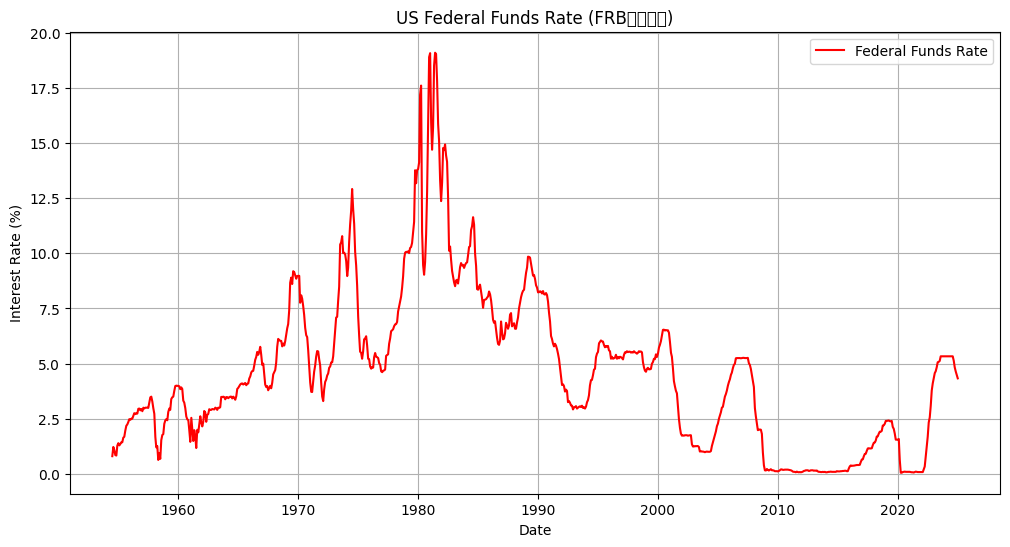

In [59]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# APIキーを設定（取得したキーをここに入れる）
API_KEY = "5a0f40790f4dda8d7e95182f9acebf7e"

# FRED APIのURL
api_url = "https://api.stlouisfed.org/fred/series/observations"
params = {
    "series_id": "FEDFUNDS",  # FRBの政策金利
    "api_key": API_KEY,  # 取得したAPIキー
    "file_type": "json"
}

# APIリクエストを送信
response = requests.get(api_url, params=params)
data = response.json()

# APIレスポンスを確認
if "observations" in data:
    # DataFrameに変換
    df = pd.DataFrame(data["observations"])
    df["date"] = pd.to_datetime(df["date"])
    df["value"] = df["value"].astype(float)

    # グラフを作成
    plt.figure(figsize=(12, 6))
    plt.plot(df["date"], df["value"], label="Federal Funds Rate", color="red")
    plt.title("US Federal Funds Rate (FRB政策金利)")
    plt.xlabel("Date")
    plt.ylabel("Interest Rate (%)")
    plt.legend()
    plt.grid()
    plt.show()

else:
    print("データの取得に失敗しました。APIキーが正しいか確認してください。")


[*********************100%***********************]  1 of 1 completed


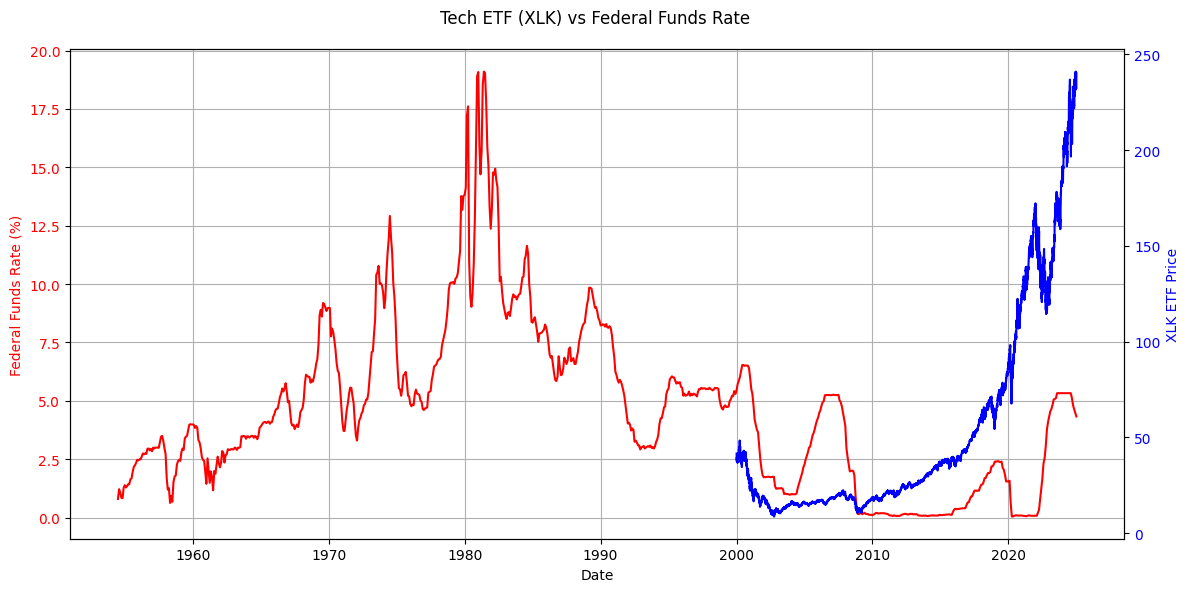

In [60]:
# XLK（テクノロジーETF）と金利の関係を分析
import yfinance as yf

# XLKのデータ取得
xlk = yf.download("XLK", start="2000-01-01", end="2025-01-01")["Close"]

# プロット（右軸を追加）
fig, ax1 = plt.subplots(figsize=(12, 6))

# 金利を左軸にプロット
ax1.plot(df["date"], df["value"], label="Federal Funds Rate", color="red")
ax1.set_xlabel("Date")
ax1.set_ylabel("Federal Funds Rate (%)", color="red")
ax1.tick_params(axis="y", labelcolor="red")
ax1.grid()

# XLKを右軸にプロット
ax2 = ax1.twinx()
ax2.plot(xlk, label="XLK (Tech ETF)", color="blue")
ax2.set_ylabel("XLK ETF Price", color="blue")
ax2.tick_params(axis="y", labelcolor="blue")

# タイトルと凡例
fig.suptitle("Tech ETF (XLK) vs Federal Funds Rate")
fig.tight_layout()
plt.show()


In [62]:
print(xlk.head())


Ticker            XLK
Date                 
2000-01-03  41.561359
2000-01-04  39.452850
2000-01-05  38.867138
2000-01-06  37.578590
2000-01-07  38.234577


In [65]:
# 金利データを日付でインデックス設定
df.set_index("date", inplace=True)

# XLKのカラム名を確認
print(xlk.columns)

# 必要ならカラム名を変更
xlk = xlk.rename(columns={"Ticker": "XLK"})  # "Ticker" ではなく正しいカラム名にする

# 金利とXLKのデータをマージ
df_merged = df.join(xlk, how="inner")

# 相関係数を計算
correlation = df_merged["value"].corr(df_merged["XLK"])

print(f"Federal Funds Rate と XLK の相関係数: {correlation:.4f}")


Index(['XLK'], dtype='object', name='Ticker')
Federal Funds Rate と XLK の相関係数: 0.2232


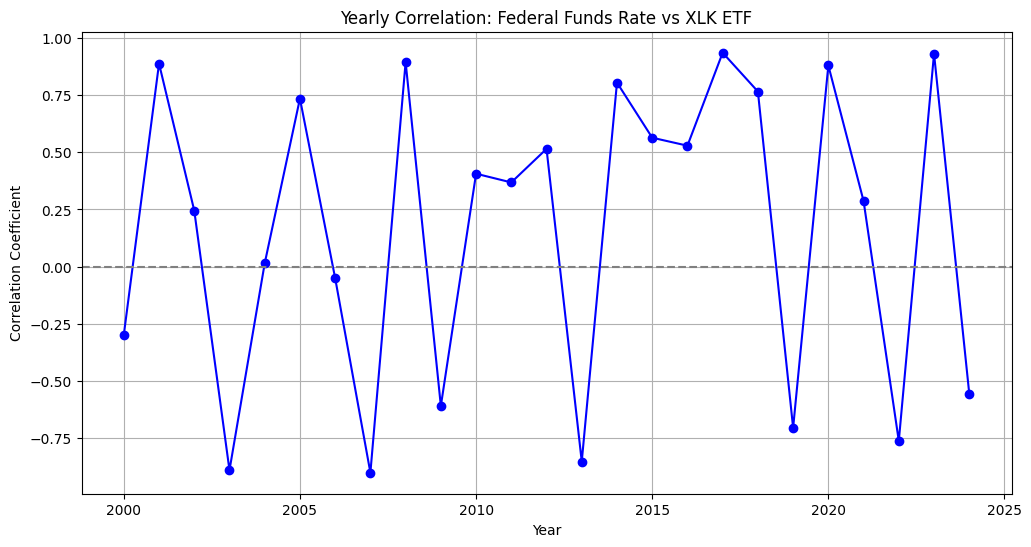

In [66]:
# 1年ごとの相関係数を計算
df_merged["year"] = df_merged.index.year
yearly_correlation = df_merged.groupby("year")[["value", "XLK"]].corr().unstack()["value"]["XLK"]

# 相関の推移をプロット
plt.figure(figsize=(12, 6))
plt.plot(yearly_correlation.index, yearly_correlation, marker="o", linestyle="-", color="blue")
plt.axhline(0, color="gray", linestyle="--")  # 0ライン
plt.title("Yearly Correlation: Federal Funds Rate vs XLK ETF")
plt.xlabel("Year")
plt.ylabel("Correlation Coefficient")
plt.grid()
plt.show()


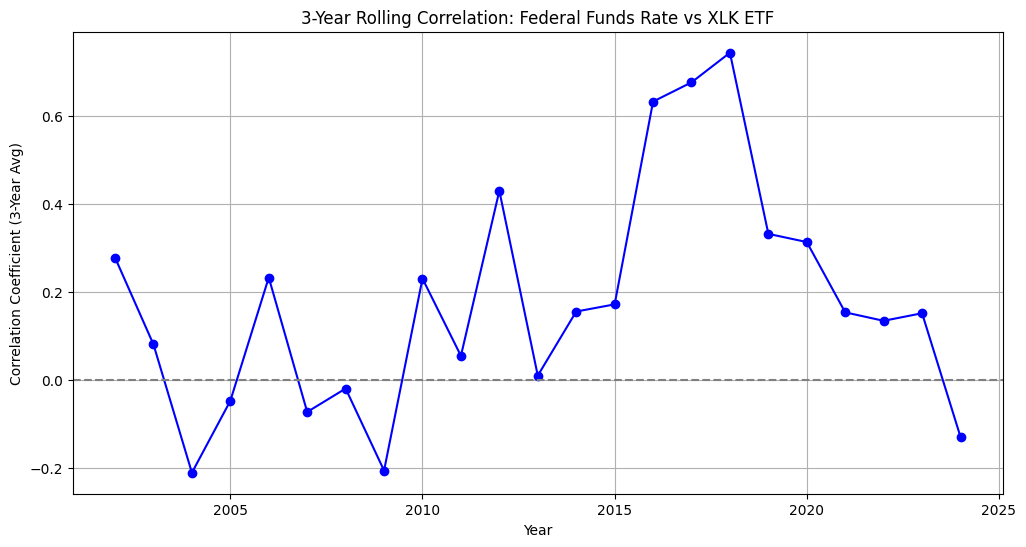

In [67]:
# 3年移動平均の相関係数
rolling_corr = yearly_correlation.rolling(window=3).mean()

# プロット
plt.figure(figsize=(12, 6))
plt.plot(rolling_corr.index, rolling_corr, marker="o", linestyle="-", color="blue")
plt.axhline(0, color="gray", linestyle="--")  # 0ライン
plt.title("3-Year Rolling Correlation: Federal Funds Rate vs XLK ETF")
plt.xlabel("Year")
plt.ylabel("Correlation Coefficient (3-Year Avg)")
plt.grid()
plt.show()
